![alt text](images/panor_large.jpg "Title")

## project

- Task: to predict the forest cover type (the predominant kind of tree cover) from strictly cartographic variables (as opposed to remotely sensed data). 


## data

- The dataset: The actual forest cover type for a given 30 x 30 meter cell was determined from US Forest Service (USFS) Region 2 Resource Information System data. Independent variables were then derived from data obtained from the US Geological Survey and USFS. The data is in raw form (not scaled) and contains binary columns of data for qualitative independent variables such as wilderness areas and soil type.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. These areas represent forests with minimal human-caused disturbances, so that existing forest cover types are more a result of ecological processes rather than forest management practices.

- source: https://archive.ics.uci.edu/ml/datasets/covertype

## target

- What kind of vegetation will gow in Roosevelt National Forest.
- The forest has a total area of 813,799 acres (1,271.56 sq mi, or 3,293.33 km2). The Forests and Grassland varies in elevation and ecosystems.  Ecosystems includes short-grass prairies around 5,000 feet;  Montane from 6,000 to 9,000 feet; Subalpine from 9,000 to 11,200 feet; and Alpine/Tundra above 11,200 feet.
- The seven types of cover types  are:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

- 'Spruce/Fir' and 'Krummholz' are types of vegetation, and include various types of species.
- 'Lodgepole Pine', 'Ponderosa Pine', and 'Douglas-fir' are are evergreen species from the Pinaceae family.
- 'Cottonwood/Willow' includes two secies, both from the Salicaceae family.

## features

- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

- The wilderness areas are:
1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

- The soil types are:
1. Cathedral family - Rock outcrop complex, extremely stony.
2. Vanet - Ratake families complex, very stony.
3. Haploborolis - Rock outcrop complex, rubbly.
4. Ratake family - Rock outcrop complex, rubbly.
5. Vanet family - Rock outcrop complex complex, rubbly.
6. Vanet - Wetmore families - Rock outcrop complex, stony.
7. Gothic family.
8. Supervisor - Limber families complex.
9. Troutville family, very stony.
10. Bullwark - Catamount families - Rock outcrop complex, rubbly.
11. Bullwark - Catamount families - Rock land complex, rubbly.
12. Legault family - Rock land complex, stony.
13. Catamount family - Rock land - Bullwark family complex, rubbly.
14. Pachic Argiborolis - Aquolis complex.
15. unspecified in the USFS Soil and ELU Survey.
16. Cryaquolis - Cryoborolis complex.
17. Gateview family - Cryaquolis complex.
18. Rogert family, very stony.
19. Typic Cryaquolis - Borohemists complex.
20. Typic Cryaquepts - Typic Cryaquolls complex.
21. Typic Cryaquolls - Leighcan family, till substratum complex.
22. Leighcan family, till substratum, extremely bouldery.
23. Leighcan family, till substratum - Typic Cryaquolls complex.
24. Leighcan family, extremely stony.
25. Leighcan family, warm, extremely stony.
26. Granile - Catamount families complex, very stony.
27. Leighcan family, warm - Rock outcrop complex, extremely stony.
28. Leighcan family - Rock outcrop complex, extremely stony.
29. Como - Legault families complex, extremely stony.
30. Como family - Rock land - Legault family complex, extremely stony.
31. Leighcan - Catamount families complex, extremely stony.
32. Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
33. Leighcan - Catamount families - Rock outcrop complex, extremely stony.
34. Cryorthents - Rock land complex, extremely stony.
35. Cryumbrepts - Rock outcrop - Cryaquepts complex.
36. Bross family - Rock land - Cryumbrepts complex, extremely stony.
37. Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
38. Leighcan - Moran families - Cryaquolls complex, extremely stony.
39. Moran family - Cryorthents - Leighcan family complex, extremely stony.
40. Moran family - Cryorthents - Rock land complex, extremely stony.

## 1. EDA

For more detalis please check my notebook '1.0.EDA'

In [1]:
# common imports
import numpy as np
import pandas as pd
import os
import sklearn

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import lightgbm as lgb
import xgboost

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV, RandomizedSearchCV, RepeatedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

from sklearn.feature_selection import SelectKBest

from sklearn.pipeline import Pipeline

# to make this notebook's output stable across runs
np.random.seed(4)

# to plot figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
plt.style.use("fivethirtyeight")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

- First approach:

In [2]:
train = pd.read_csv('data/train.csv')
train.shape

(15120, 56)

The dataset doesn't contain:

Duplicates

Null values

- Find if there's columns only with 0s:

In [20]:
train.select_dtypes(include=['float64', 'int64']).sum().sort_values().head()

Soil_Type7     0
Soil_Type15    0
Soil_Type25    1
Soil_Type8     1
Soil_Type28    9
dtype: int64

- Outliers:

In [21]:
cont_columns = [ 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']

In [22]:
# outliers in non binary features

def number_of_outliers(df):
    
    df = df[[ 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']]
    
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    return ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

In [25]:
number_of_outliers(train).sort_values()

Elevation                               0
Aspect                                  0
Slope                                  57
Hillshade_3pm                         124
Hillshade_Noon                        393
Hillshade_9am                         408
Horizontal_Distance_To_Hydrology      512
Vertical_Distance_To_Hydrology        586
Horizontal_Distance_To_Fire_Points    645
Horizontal_Distance_To_Roadways       830
dtype: int64

- Checking for negative values:

In [18]:
(train < 0).sum().sort_values(ascending=False).head(3)

Vertical_Distance_To_Hydrology    1139
Id                                   0
Soil_Type28                          0
dtype: int64

 - the target is perfectly balanced:


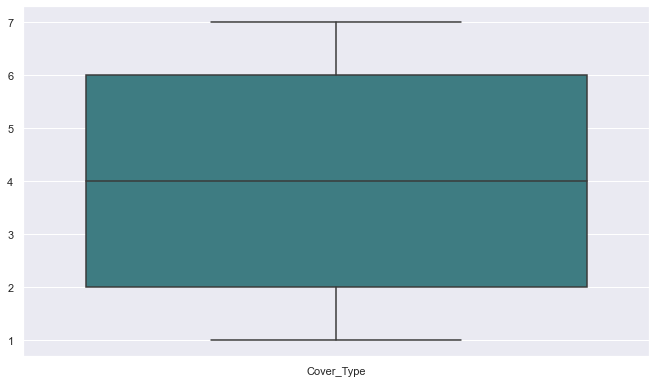

In [38]:
sns.set_theme(rc = {'figure.figsize':(10,6)}, palette='crest')
sns.boxplot(data=train[['Cover_Type']], palette='crest');

- Data types:

In [50]:
cont_columns = [ 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
    
cat_columns = [ 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']

target = 'Cover_Type'

- the continuous data:

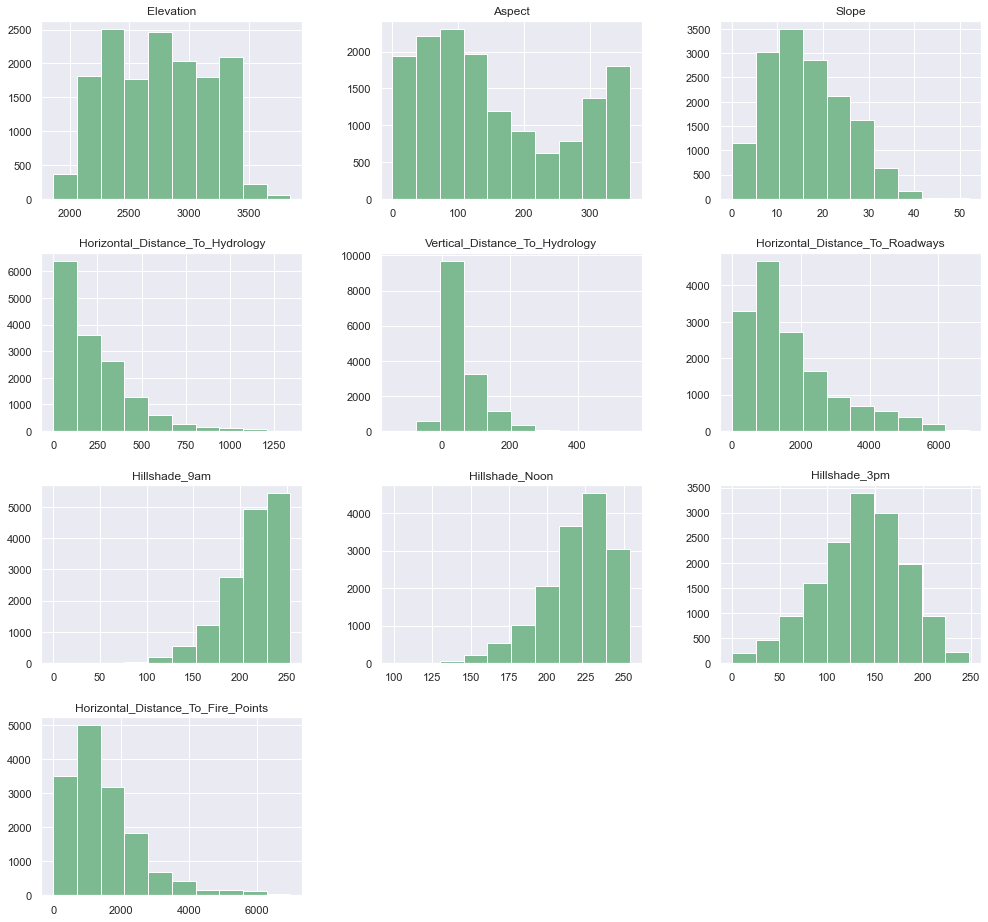

In [53]:
sns.set_theme(rc = {'figure.figsize':(15,15)}, palette='crest')

train[cont_columns].hist(figsize=(15,15));

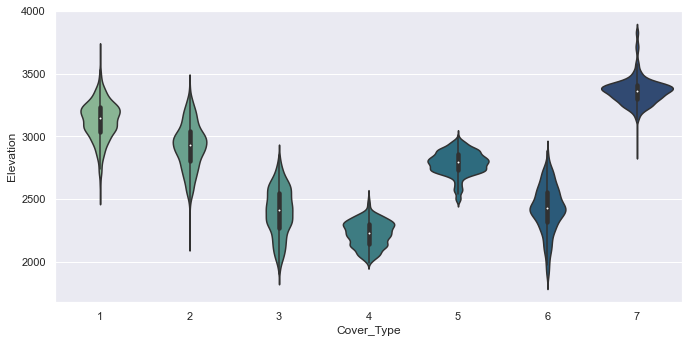

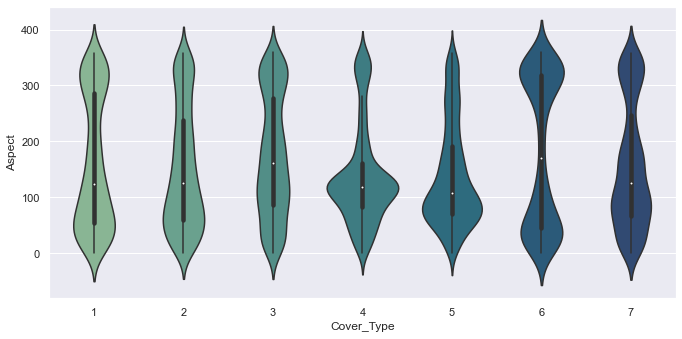

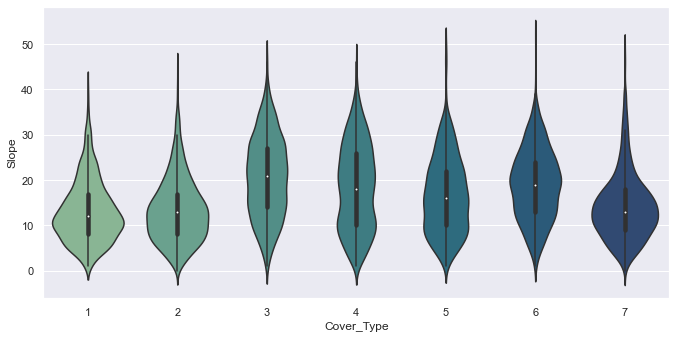

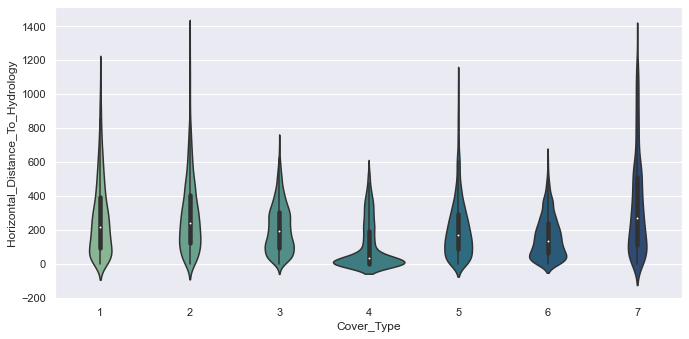

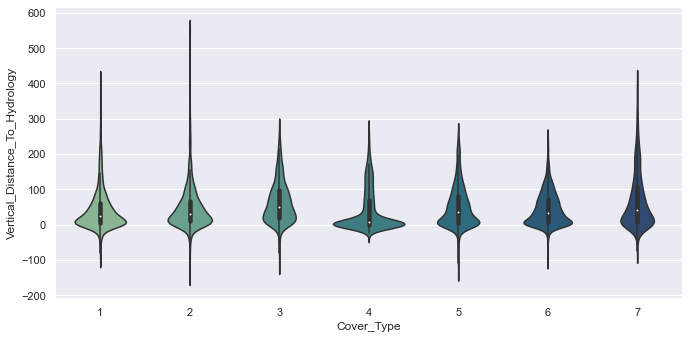

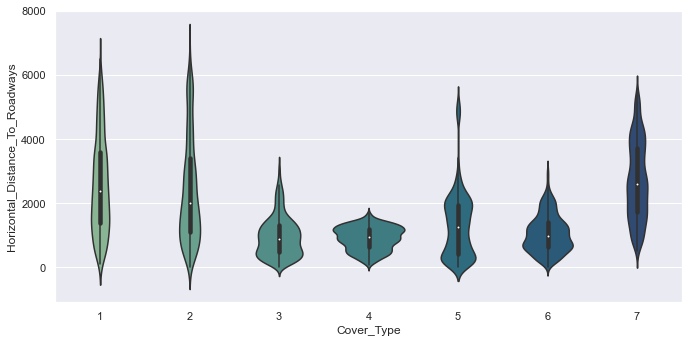

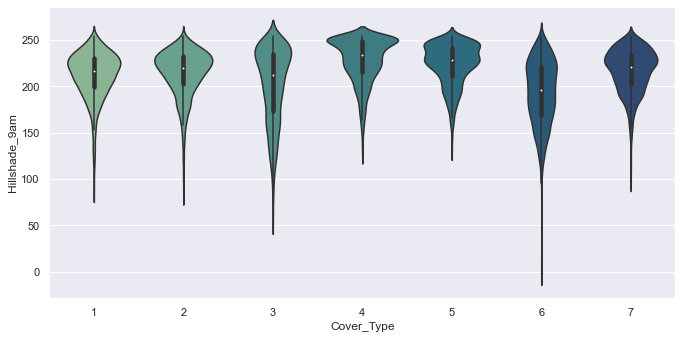

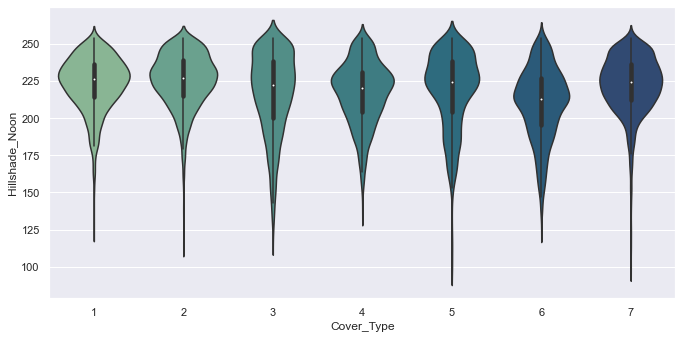

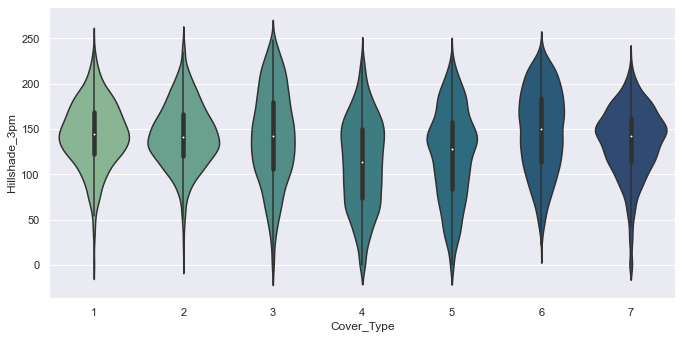

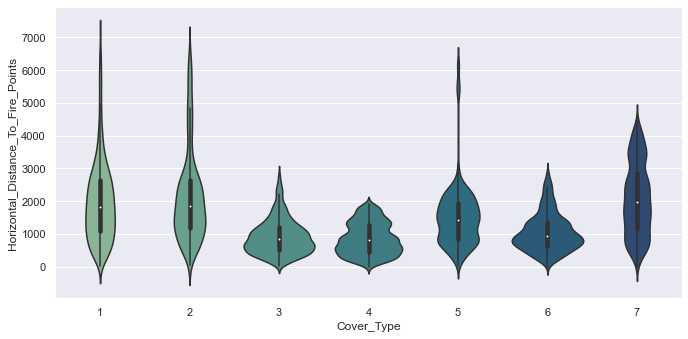

In [83]:
for index in range(len(cont_columns)):
  plt.figure(index, figsize=(10,5))
  sns.violinplot(y = train[cont_columns[index]], x = train[target], palette='crest')

- Soil types:

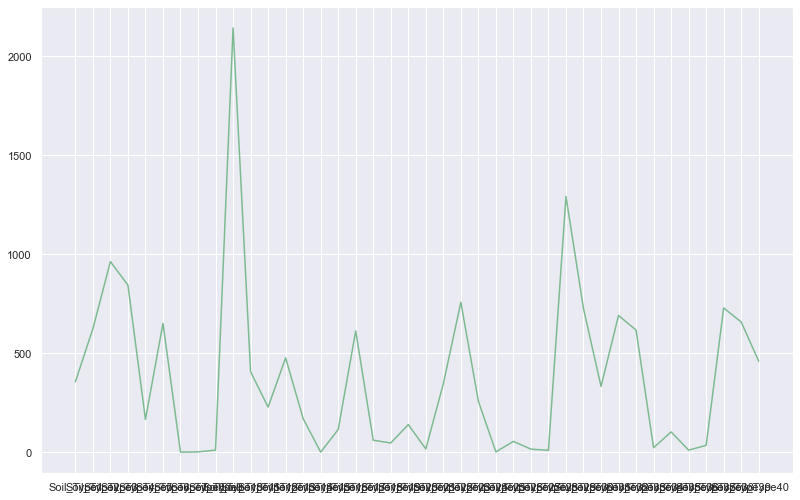

In [4]:
soil = train.iloc[:, 15:-1].sum()
sns.set_theme(rc = {'figure.figsize':(12,8)}, palette='crest')
sns.lineplot(data=soil);

- Wilderness Areas:

In [79]:
wild = train.iloc[:, 11:15].sum()
wild

Wilderness_Area1    3597
Wilderness_Area2     499
Wilderness_Area3    6349
Wilderness_Area4    4675
dtype: int64

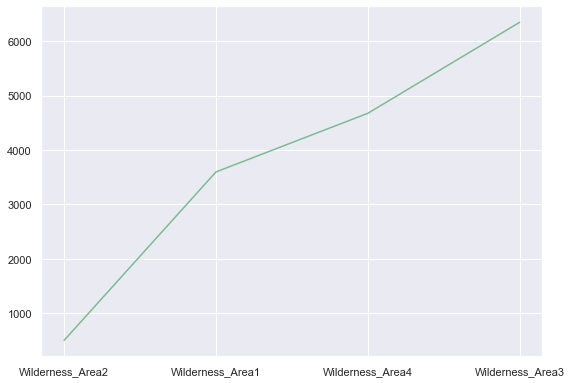

In [80]:
sns.set_theme(rc = {'figure.figsize':(8,6)}, palette='crest')
sns.lineplot(data=wild.sort_values());

## first conclusions:

- there's two types of quantitative/numerical data: continuous and discrete (binary)
- the dataset is free of nulls and duplicates
- the number of outliers is very small
- only 'Vertical_Distance_To_Hydrology' has negative values
- there's two colums (Soil_Type15 and Soil_Type7) only with 0s
- the continuous features more correlated with the target are: Elevation and Distances to Roadways, Fire Points and Hydrology.

## 2. Feature Engineering

For more detalis please check my notebook '1.2.Feat_Eng'

- Checking the raw dataset

In [89]:
from sklearn.feature_selection import SelectKBest

X = train.drop(['Id', 'Cover_Type'], axis=1)
y = train['Cover_Type']

print(X.shape)
sel = SelectKBest(k=5)
X_new = sel.fit_transform(X, y)
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column': X.columns, 'score': sel.scores_}).sort_values('score', ascending=False)

(15120, 54)
(15120, 5)
[1.62412333e+04 4.82973750e+01 3.01849051e+02 3.75897228e+02
 7.47361332e+01 1.22307046e+03 3.78220751e+02 1.17983196e+02
 1.97802459e+02 7.46124576e+02 9.28831132e+02 1.67668321e+02
 4.44959975e+02 5.07249791e+03 8.69410921e+01 1.45220461e+02
 9.29217593e+02 2.48325587e+02 4.13813573e+01 1.66973792e+02
            nan 1.00000000e+00 7.92643368e+00 9.77737621e+02
 5.32492573e+01 1.93312894e+02 1.97416602e+02 9.92883070e+01
            nan 1.55081162e+01 2.04175621e+02 3.31681108e+01
 1.06153059e+01 2.86957446e+01 9.03767442e+00 2.33563396e+02
 1.94900394e+02 6.36016884e+01 1.00000000e+00 1.69621555e+01
 3.96387866e+00 4.34137664e+00 3.41825668e+02 3.52446574e+02
 5.50679713e+01 1.22048655e+02 7.22167680e+01 5.89840867e+00
 9.71607722e+01 6.28354697e+00 3.45277516e+01 7.44906554e+02
 6.40529899e+02 4.22043458e+02]


C:\Users\IRENE\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [20 28] are constant.
  UserWarning)
C:\Users\IRENE\AppData\Roaming\Python\Python37\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


,column,score
0,Elevation,16241.233317
13,Wilderness_Area4,5072.497908
5,Horizontal_Distance_To_Roadways,1223.070458
23,Soil_Type10,977.737621
16,Soil_Type3,929.217593
10,Wilderness_Area1,928.831132
9,Horizontal_Distance_To_Fire_Points,746.124576
51,Soil_Type38,744.906554
52,Soil_Type39,640.529899
12,Wilderness_Area3,444.959975


## Decision point:

We are starting with Tree Ensembles, so the Feature Engineering will consist on:
1. transformation of binary features (Wilderness Area and Soil Type) into continuous ones
2. creation of new features as: 

In [ ]:
train['human_presence'] = train['Horizontal_Distance_To_Roadways'] + train['Horizontal_Distance_To_Fire_Points']

train['eDist_to_Hydrology'] = (train['Horizontal_Distance_To_Hydrology']**2 + train['Vertical_Distance_To_Hydrology']**2)**0.5 

train['Total_Hillshade_mean'] = (train['Hillshade_9am'] + train['Hillshade_3pm'] + train['Hillshade_Noon']) / 3

train['Elevation_Aspect_ratio'] = train['Elevation']/(train['Aspect']+1)

train['Hillshade_Noon_Aspect_ratio'] = train['Hillshade_Noon']/(train['Aspect']+1)

train['Hillshade_Noon_Elevation_ratio'] = train['Hillshade_Noon']/(train['Elevation']+1)

- Cheking:

In [102]:
from sklearn.feature_selection import SelectKBest

X = train.drop(['Id', 'Cover_Type'], axis=1)
y = train['Cover_Type']

print(X.shape)
sel = SelectKBest(k=5)
X_new = sel.fit_transform(X, y)
print(X_new.shape)
print(sel.scores_)

pd.DataFrame({'column': X.columns, 'score': sel.scores_}).sort_values('score', ascending=False)

(15120, 18)
(15120, 5)
[1.62412333e+04 4.82973750e+01 3.01849051e+02 3.75897228e+02
 7.47361332e+01 1.22307046e+03 3.78220751e+02 1.17983196e+02
 1.97802459e+02 7.46124576e+02 2.88995798e+03 6.53910511e+03
 1.46996263e+03 3.49333315e+02 1.24738126e+02 1.83150310e+01
 8.09538193e+00 3.25372710e+03]


,column,score
0,Elevation,16241.233317
11,Soil_Type,6539.105106
17,Hillshade_Noon_Elevation_ratio,3253.727103
10,Wilderness_Area,2889.957976
12,human_presence,1469.962628
5,Horizontal_Distance_To_Roadways,1223.070458
9,Horizontal_Distance_To_Fire_Points,746.124576
6,Hillshade_9am,378.220751
3,Horizontal_Distance_To_Hydrology,375.897228
13,eDist_to_Hydrology,349.333315


I've also tried to bin features with high variance, but I didn't got better results.

## Testing:

Tree ensembles on three datasets: raw, modificated, and modificated + binned. I've got the better results without binning.

SCORES with raw data:

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.85


The score in train of model GradientBoostingClassifier is 0.84
The score in test of model GradientBoostingClassifier is 0.78


The score in train of model AdaBoostClassifier is 0.43
The score in test of model AdaBoostClassifier is 0.42


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.85


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.85

SCORES with feature engineering:

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.84


The score in train of model GradientBoostingClassifier is 0.86
The score in test of model GradientBoostingClassifier is 0.79


The score in train of model AdaBoostClassifier is 0.43
The score in test of model AdaBoostClassifier is 0.42


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.87


The score in train of model LGBMClassifier is 0.99
The score in test of model LGBMClassifier is 0.85

## So, I've found...

That all the models gave similar cofusion matrices, showing that the 'Spruce/fir' and the 'Lodgepole Pine' are always mistaken:

![alt text](images/matrix_pre_1.png "Title")

![alt text](images/matrix_pre_2.png "Title")

Empecé a investivar por qué era tan difícil distinguir entre ambaas especies, cuando descubrí que 'Spruce/fir' no es una especie de árbol, sino un tipo de bosque, formado por multitud de especies de coníferas.

Tras seguir investigando, constaté que, aunque la descripción del tataset habla de especies, en realidad, dos de las categorías son tipos de bosques, no de árboles: 'Spruce/Fir y Krummholz.

## Decision point:

Decidí hacer un modelo para los bosques y otro para las especies (o conjuntos pequeños de especies muy similares, como 'Cottonwood/Willow'.

In [20]:
train = pd.read_csv('train_CONT_5.csv')

In [21]:
train__1 = train[(train['Cover_Type'].isin([1,7]))]
train__2 = train[(train['Cover_Type'].isin([2,3,4,5,6]))]

## Model 1

In [22]:
rfc= RandomForestClassifier(random_state=77)
etc = ExtraTreesClassifier(random_state=77)
lgbm = lgb.LGBMClassifier(objective= 'binary',random_state=77)

models= [rfc, etc, lgbm]

In [23]:
X_1= train__1.drop(['Cover_Type', 'Id'], axis=1) 
y_1= train__1['Cover_Type']
X_1_train, X_1_test, y_1_train, y_1_test= train_test_split(X_1,y_1, test_size= 0.2)

In [24]:
for model in models:
    model.fit(X_1_train, y_1_train) 
    train_score= model.score(X_1_train, y_1_train) 
    test_score= model.score(X_1_test, y_1_test)
    #clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The score in train of model {type(model).__name__} is {train_score:.2f}")
    print(f"The score in test of model {type(model).__name__} is {test_score:.2f}")
    #print(clf_report)
    print("\n")

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.95


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.95


The score in train of model LGBMClassifier is 1.00
The score in test of model LGBMClassifier is 0.96




In [25]:
y_1_test_pred_lgbm = lgbm.predict(X_1_test)

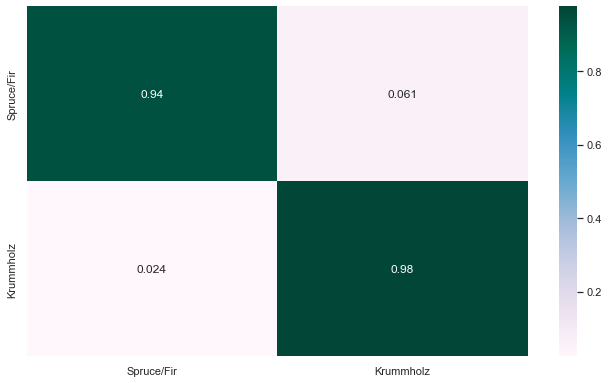

In [26]:
x_axis_labels = ['Spruce/Fir','Krummholz'] 
y_axis_labels = ['Spruce/Fir','Krummholz'] 

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_1_test, y_1_test_pred_lgbm, normalize='true'), annot=True, xticklabels=x_axis_labels, 
            yticklabels=y_axis_labels, cmap='PuBuGn');

In [27]:
import pickle
from datetime import datetime

filename = 'my_model_1'

date = str(datetime.today().strftime('%y%m%d%H%M%S'))

name = filename + date

# path = ruta relativa

with open(name, 'wb') as archivo_salida:
    pickle.dump(lgbm, archivo_salida)

In [28]:
rfc_2= RandomForestClassifier(random_state=77)
etc_2 = ExtraTreesClassifier(random_state=77)
lgbm_2 = lgb.LGBMClassifier(random_state=77)

models= [rfc_2, etc_2, lgbm_2]

In [29]:
X_2= train__2.drop(['Cover_Type', 'Id'], axis=1) 
y_2= train__2['Cover_Type']
X_2_train, X_2_test, y_2_train, y_2_test= train_test_split(X_2,y_2, test_size= 0.2)

In [30]:
for model in models:
    model.fit(X_2_train, y_2_train) 
    train_score= model.score(X_2_train, y_2_train) 
    test_score= model.score(X_2_test, y_2_test)
    #clf_report= classification_report(y_test, y_pred) # with the report, we have a bigger picture, with precision and recall for each class
    print(f"The score in train of model {type(model).__name__} is {train_score:.2f}")
    print(f"The score in test of model {type(model).__name__} is {test_score:.2f}")
    #print(clf_report)
    print("\n")

The score in train of model RandomForestClassifier is 1.00
The score in test of model RandomForestClassifier is 0.90


The score in train of model ExtraTreesClassifier is 1.00
The score in test of model ExtraTreesClassifier is 0.91


The score in train of model LGBMClassifier is 1.00
The score in test of model LGBMClassifier is 0.91




In [31]:
y_1_test_pred_etc_2 = etc_2.predict(X_2_test)

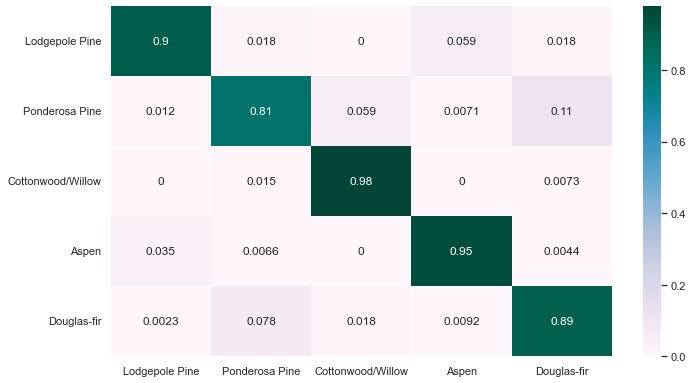

In [32]:
x_axis_labels = ['Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir'] 
y_axis_labels = ['Lodgepole Pine','Ponderosa Pine','Cottonwood/Willow','Aspen','Douglas-fir'] 

plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix(y_2_test, y_1_test_pred_etc_2, normalize='true'), annot=True, 
                            xticklabels=x_axis_labels, yticklabels=y_axis_labels, cmap='PuBuGn');

In [33]:
import pickle
from datetime import datetime

filename = 'my_model_2'

date = str(datetime.today().strftime('%y%m%d%H%M%S'))

name = filename + date

# path = ruta relativa

with open(name, 'wb') as archivo_salida:
    pickle.dump(etc_2, archivo_salida)

- hacer dos modelos mejora la precisión de las predicciones
- el preceso completo de toma de decisión así como los modelos definitivos están en el notebook '1.2.model_selection_5'